# Regularized Linear Regression

### Sam Miller
#### 6/26/2019

First, let's start with a recap of good old linear regression.

Lot's of ways to perform linear regression in python

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1)

In [3]:
x = np.linspace(-10, 10, 100) + np.random.rand(100)
y = 3.5*x + 0.3*x**2 + np.random.normal(0.0, 10.0, 100)

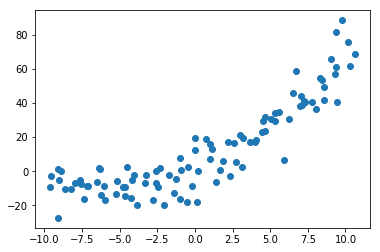

In [4]:
plt.plot(x, y, 'o')

In [5]:
fit = np.polyfit(x, y, 1)
pred = np.poly1d(fit)
y_fit = pred(x)

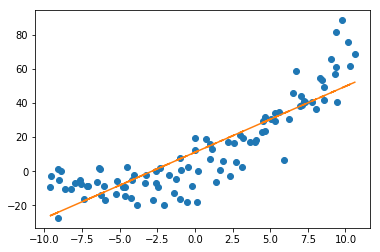

In [6]:
plt.plot(x, y, 'o')
plt.plot(x, y_fit, '-')

BOOM! Linear regression. We've surely all done it in EXCEL, in our TI-92 calculator, maybe in MATLAB, maybe 10 different ways in python... 

### BUT

Let's step back briefly, because there's actually a fair amount of interesting theory that goes into this seemingly simple operation. Understanding these fundamentals is important to extending this type of model, and building on it to perform "MACHINE LEARNING"

First of all,

### How do we fit the model? And why do it that way?

## HOW: Minimize Least Squares

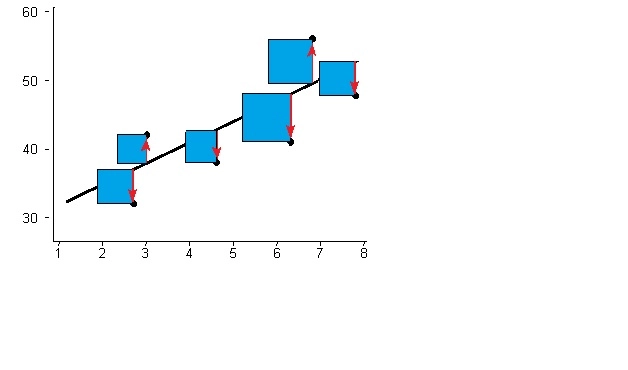

To minimize the least squares, take a look at the least squares function

$$ minimize: \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where our prediction $\hat{y}_i$ is a function:

$$ \hat{y}_i = m * x_i + b $$

Or in matrix notation

$$ Y = \begin{bmatrix}
y_1\\
y_2\\
...\\
y_n
\end{bmatrix} $$

$$ X = \begin{bmatrix}
x_1\\
x_2\\
...\\
x_n
\end{bmatrix} $$

$$ \hat{Y} = m X + b $$

Or even better 

$$ X = \begin{bmatrix}
x_1, &1\\
x_2,&1\\
...\\
x_n,&1
\end{bmatrix} $$

$$\beta = \begin{bmatrix} m\\ b \end{bmatrix}$$

$$ \hat{Y} = X\beta$$

$$ \Longrightarrow minimize: \sum(Y - \hat{Y})^2 $$

#### ^ This is also known as our "loss function" or "objective function" or "cost function". 

Generally speaking, it is a function that operates on the residual $y_i - \hat{y}_i $

But how do we **fit** it? 

## What is $\beta$? 

How do we minimize our loss function?

Is it CONVEX?

Convex Shapes:

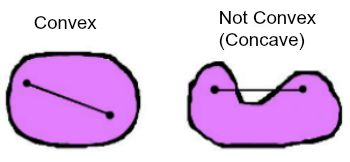

Convex Functions ("epi-graph" is convex):

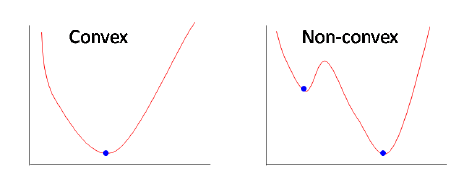


**Convex functions that are differentiable can be minimized by setting the derivative equal to zero** 

(note the unique minima in the function on the left where $\frac{\partial{y}}{\partial{x}} = 0 $ )

### Loss Function

$$ F(\beta) = \sum(Y - X\beta)^2 $$

$$ F(\beta) = (Y - X\beta)^T(Y - X\beta) $$

Take the derivative of the loss function:

$$ \frac{d F}{d \beta} = -2 X^TY + 2X^TX\beta $$

Set the derivative equal to zero:

$$ 0 = -2 X^TY + 2X^TX\beta $$

Solve for $\beta$

$$ X^TY = X^TX\beta $$

$$ \beta = (X^TX)^{-1}X^TY $$

In [7]:
x_mat = np.concatenate((x.reshape(-1,1), np.ones(100).reshape(-1,1)), axis = 1)
x_mat[0:5]

array([[-9.582978  ,  1.        ],
       [-9.0776553 ,  1.        ],
       [-9.59584522,  1.        ],
       [-9.09160682,  1.        ],
       [-9.0451633 ,  1.        ]])

In [8]:
np.dot(np.linalg.inv(np.dot(x_mat.T,x_mat)),np.dot(x_mat.T,y))

array([ 3.86222403, 11.12001308])

In [9]:
# previous fit using numpy polyfit
fit

array([ 3.86222403, 11.12001308])

(array([ 3.,  5.,  6.,  2., 12., 16., 22.,  5., 12.,  7.,  3.,  5.,  0.,
         1.,  1.]),
 array([-29.739088  , -25.12780617, -20.51652433, -15.9052425 ,
        -11.29396067,  -6.68267883,  -2.071397  ,   2.53988483,
          7.15116667,  11.7624485 ,  16.37373033,  20.98501217,
         25.596294  ,  30.20757583,  34.81885767,  39.4301395 ]),
 <a list of 15 Patch objects>)

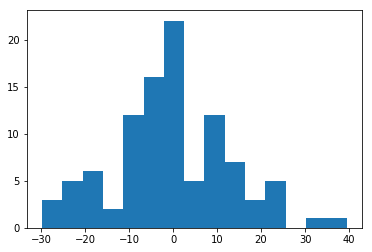

In [10]:
residual = y - y_fit
plt.hist(residual, bins = 15)

In [11]:
variance = 1/len(y) * np.sum(residual**2)
variance

173.80371023327586

In [12]:
standard_dev = variance**0.5
standard_dev

13.18346351431504

## KEY TAKEAWAYS

* We defined our **loss function** as the sum of squares
* Our loss function is **convex** and **differential**
* We minimized our loss function by setting the **derivative equal to zero** and solving for our coefficient $\beta$

This model can be extended to other models, for example - higher order polynomials

$$ X = \begin{bmatrix}
x_1^2, &x_1, &1\\
x_2^2, &x_2,&1\\
...\\
x_n^2, &x_n,&1
\end{bmatrix} $$

$$\beta = \begin{bmatrix} m_2 \\ m_1\\ b \end{bmatrix}$$

$$ \hat{Y} = X\beta$$

$$ \beta = (X^TX)^{-1}X^TY $$

In [13]:
x_squared = x**2
x_mat_2 = np.concatenate((x_squared.reshape(-1,1), x.reshape(-1,1), np.ones(100).reshape(-1,1)), axis = 1)

In [14]:
np.dot(np.linalg.inv(np.dot(x_mat_2.T,x_mat_2)),np.dot(x_mat_2.T,y))

array([0.3089735 , 3.5718672 , 0.49097857])

In [15]:
fit_2 = np.polyfit(x, y, 2)
fit_2

array([0.3089735 , 3.5718672 , 0.49097857])

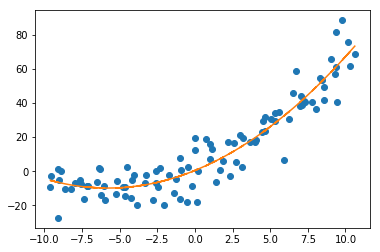

In [16]:
y_fit_2 = fit_2[0]*x**2 + fit_2[1]*x + fit_2[2]

plt.plot(x, y, 'o')
plt.plot(x, y_fit_2, '-')

(array([ 1.,  3.,  1.,  5.,  4.,  9., 10., 17., 19., 10., 10.,  6.,  1.,
         2.,  2.]),
 array([-25.57633076, -22.32284509, -19.06935943, -15.81587376,
        -12.56238809,  -9.30890243,  -6.05541676,  -2.80193109,
          0.45155457,   3.70504024,   6.95852591,  10.21201157,
         13.46549724,  16.7189829 ,  19.97246857,  23.22595424]),
 <a list of 15 Patch objects>)

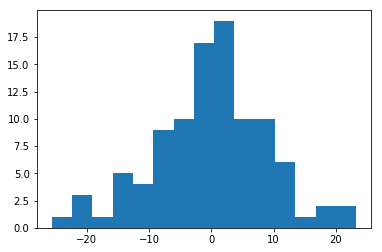

In [17]:
residual = y - y_fit_2
plt.hist(residual, bins = 15)

In [18]:
variance = 1/len(y) * np.sum(residual**2)
standard_dev = variance**0.5
standard_dev

8.974111989791993

Smaller variance. Residuals normally distributed. Good model

-----------

Jump to the Principle of Maximum Likelihood

-----------

## Maximum likelihood

$$ maximize: \prod_{i=1}^n P(y_i|x_i,\beta) $$

$$ \prod_{i=1}^n P_i = P_1 * P_2 * ... * P_n $$
using identity 

$$ log(a\cdot b) = log(a) + log(b) $$

$$ log \big( \prod_{i=1}^n P(y_i|x_i,\beta) \big) = \sum_{i=1}^n log \big( P(y_i|x_i,\beta) \big) $$

We can instead minimize:

$$ minimize: L(\beta) =: - \sum_{i=1}^n log \big( P(y_i|x_i,\beta) \big) $$

^ This is the **log-likelihood** $L(\beta)$

If we take the model error to be normally distributed:

$$ \varepsilon \sim N(0, \sigma^2) $$

$$ Y = X\beta + \varepsilon $$

(Or more generally $ Y = F_\beta(X) + \varepsilon $)

Thus, if we use the likelihood:

$$ P(Y|X,\beta) = N(X\beta, \sigma^2) $$

Using the probability density function (**pdf**) of the normal distribution:

$$P(Y|X,\beta) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\big(-\frac{(Y - X\beta)^2}{2\sigma^2}\big) $$

Taking the log-likelihood

$$ L(\beta) = -\frac{N}{2} log({2\pi}) - N log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} (Y - X\beta)^2  $$

Which can be seen is proportional to least squares, as only the final term involves $\beta$

### Gauss-Markov Theorem

In 1822, Gauss was able to state that the least-squares approach to regression analysis is optimal in the sense that in a linear model where the errors have a mean of zero, are uncorrelated, and have equal variances, the best linear unbiased estimator of the coefficients is the least-squares estimator. 

"The least squares estimates of the parameters $\beta$ have the **smallest variance** among all linear unbiased estimates."

That is:

$$ Var(\beta^*) \leq Var(\beta) $$
$$\text{  for all  } \beta \in I\!R $$

When $\beta^*$ is calculated via least squares estimate

Skip theoretical details... some probability statements

-> Actually doesn't require that the errors are normally distributed

Two words stand out: **"variance"** and **"bias"**

---------------

So
with least squares we have a really nice (low variance) model, that has is really easy to solve! Why bother doing anything different? In many cases least-squares is often all you need, which it why it is ubiquitous.

-------------------


# 2 potential problems

### 1. Bias- Variance Tradeoff
### 2. Curse of Dimensionality


-----------

## Extending Least Squares

The same prediction equation can involve many "predictor" variables:


$$ y_i = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... +\beta_kx_k $$

$$ Y = \begin{bmatrix}
y_1\\
y_2\\
...\\
y_n
\end{bmatrix} $$

$$ X = \begin{bmatrix}
x_1^k, &x_1^{k-1}, &..., &1\\
x_2^k, &x_2^{k-1}, &...,&1\\
...\\
x_n^k, &x_n^{k-1}, &...,&1
\end{bmatrix} $$

$$\beta = \begin{bmatrix} m_k \\ m_{k-1}\\...\\ b \end{bmatrix}$$

$$ \hat{Y} = X\beta$$

Now let's fit a higher order polynomial:

In [19]:
fit_50 = np.polyfit(x, y, 50)
pred = np.poly1d(fit_50)
y_fit_50 = pred(x)

C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


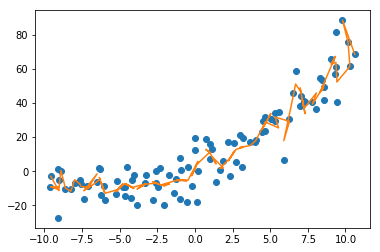

In [20]:
plt.plot(x, y, 'o')
plt.plot(x, y_fit_50, '-')

(array([ 1.,  1.,  0., 10.,  6.,  8., 14., 19., 12., 17.,  7.,  3.,  0.,
         1.,  1.]),
 array([-22.11106431, -19.13191943, -16.15277454, -13.17362966,
        -10.19448477,  -7.21533988,  -4.236195  ,  -1.25705011,
          1.72209477,   4.70123966,   7.68038454,  10.65952943,
         13.63867431,  16.6178192 ,  19.59696409,  22.57610897]),
 <a list of 15 Patch objects>)

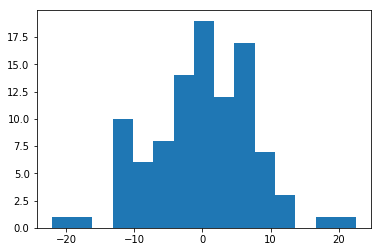

In [21]:
residual = y - y_fit_50
plt.hist(residual, bins = 15)

In [22]:
variance = 1/len(y) * np.sum(residual**2)
standard_dev = variance**0.5
standard_dev

7.3732620458420515

Is this a better model? Well the residuals are normally distributed and the variance is lower than the other models... but obviously this model is biased towards the data in this specific data set. If our observations had been different, the model might have been drastically different. This is an obvious case of **"over-fitting"**



## Bias - Variance Tradeoff

Dilema: Two sources of error: error due to model bias, and error due to model variance. How do we minimize the total error???

**Bias Error**: Error due to poor model assumptions (e.g. linear fit when the true function is quadratic)

**Variance Error**: Error due to fitting the noise (e.g. high-order polynomial fit)

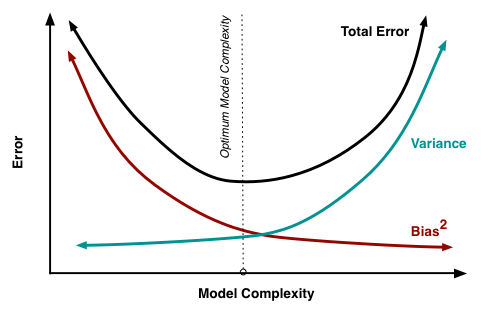

-------------

In the context of fitting a training set and predicting a validation set:

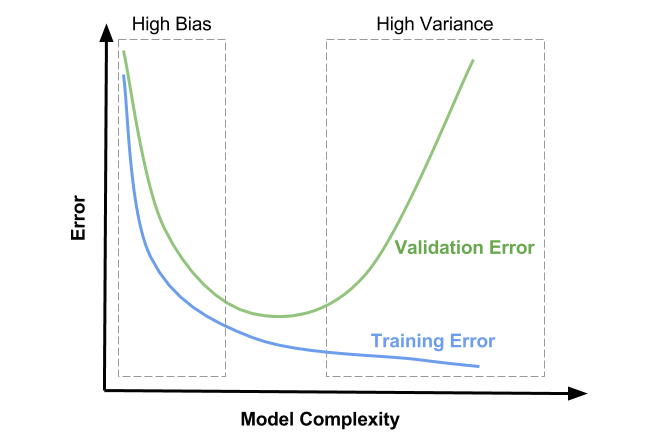

## Machine Learning Cuboid

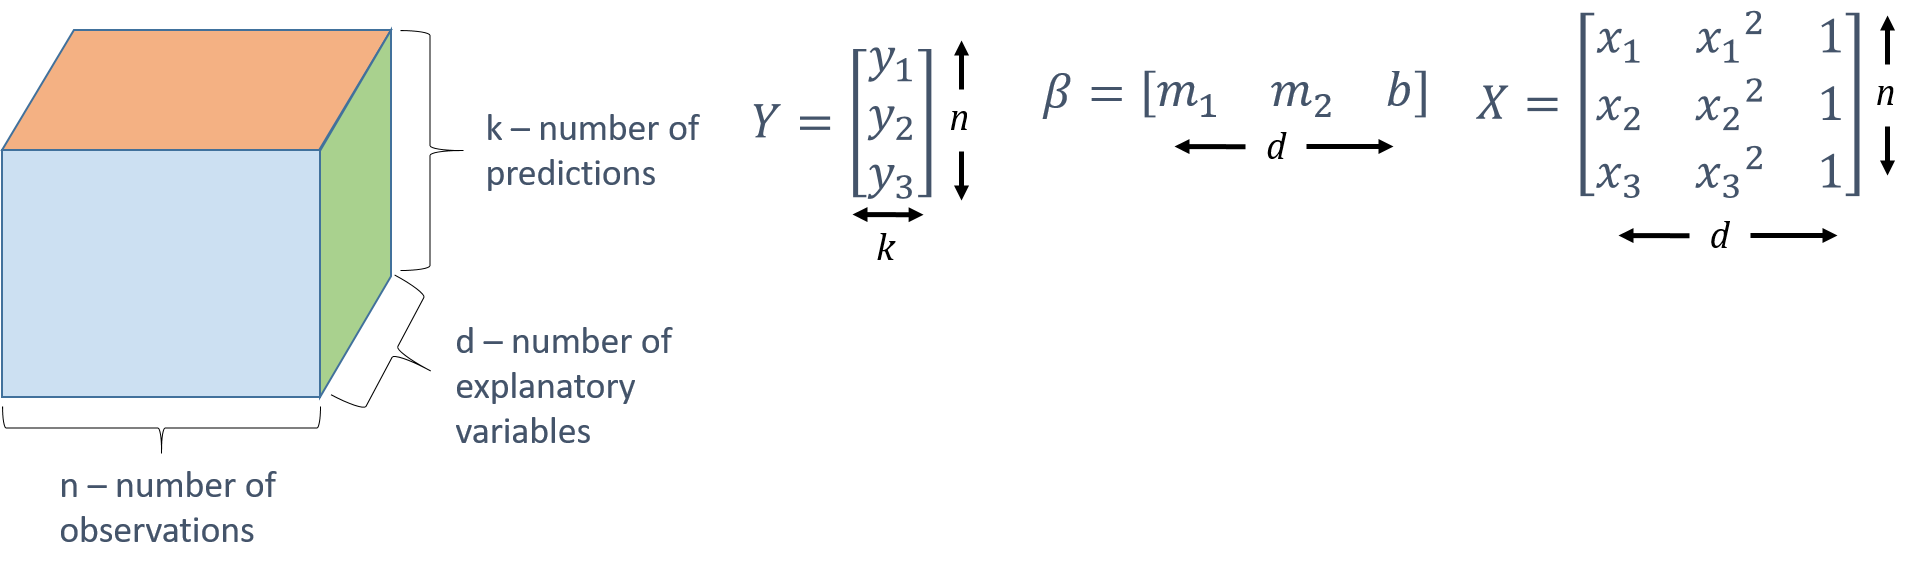

--------------

## The Curse of Dimensionality

As the number of dimensions grows, the number of test points (observations) required to "fill" the sample space tends to infinity. Neighbors in low dimensions become distant in high dimensions. 

The sampling density is proportional to  $n^{1/d}$

Let's say we have data with 1 dimension (in this case, in the range of [0,1]. We want to space the test samples out by a distance of 0.2. 

In 1 dimension, we need only 6 data points.

But in 2 dimensions, we need $6^2 = 36$ data points. Points that were neighbors (0.2 distance) in 1D can have a distance of greater than 1 in 2D!

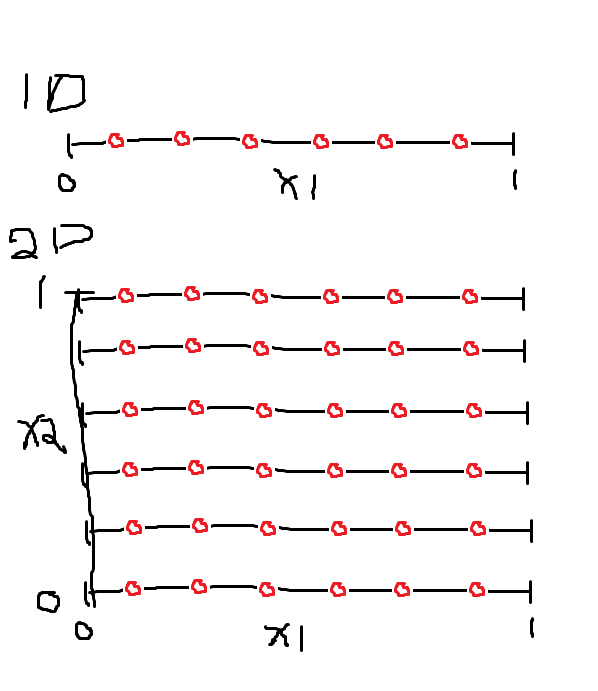

In higher dimensions, the problem gets worse. This is why "factorial" experiment design is reserved for cases with only a few parameters.

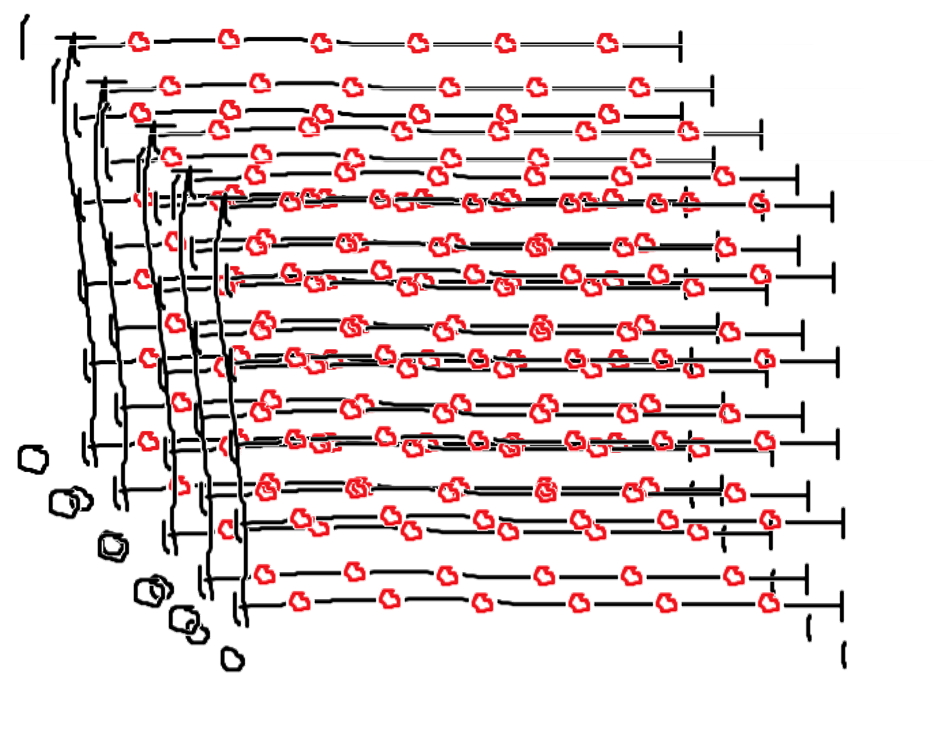

### Takeaway:

"In high dimensional data sets, all practical training samples **sparsely** populate the input space."

------------

# Thus:

Least-squares is great for data sets when $n >> d$ (avoids curse of dimensionality), and where model complexity is low (small $d$) (avoids "overfitting" due to bias-variance tradeoff). 

### BUT: This leaves lots of practical problems to be solved...

For a long, long time, people didn't think deeply about extending these models, and this lead to the entire field being under-developed until like that 1950s and onward with the invention of the personal computer. Nowadays, we are living in the era of **Big Data**. Data in massive volumes (large $n$) coming from all different sources (large $d$), and (crucially) computers powerful enough to handle these data sets. 

--------


In my opinion, this is the cleave where we now call it **"Machine Learning"** (distinct from statistical modeling) 

Machine Learning Definition: A field of study concerned with the design and development of algorithms and techniques that allow computers to learn

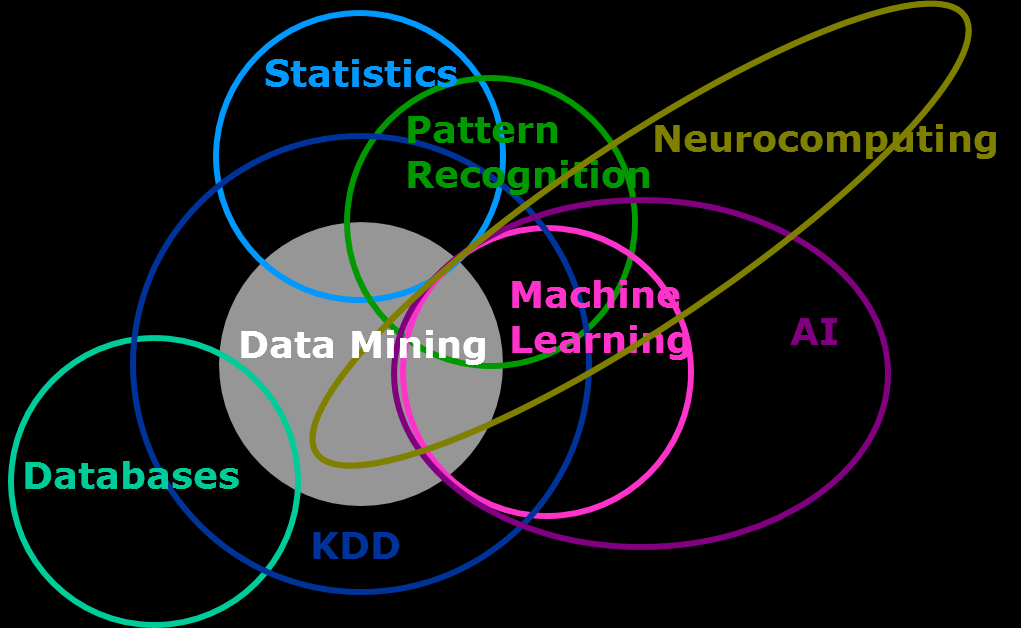


### Regularization

Cambridge Dictionary Definition:
Regularize: to change a situation or system so that it obeys laws or is **based on reason**

The first step away from ordinary least-squares towards machine learning is using regularization to penalize the model coefficients in a linear regression problem:

### Objective Function

####  Ordinary Least-Squares

$$ F(\beta) = \sum(Y - X\beta)^2 $$

#### Regularized Least-Squares

Add a term that is a function of the coefficients:

$$ F(\beta) = \sum(Y - X\beta)^2 + \Omega(\beta) $$

^ This model will have a minima that depends partly on the function $\Omega(\beta) $

#### More Generally:

The general form of an "objective function" in supervised machine learning algorithms:

$$ F(\beta) = L(Y; X\beta) + \Omega(\beta) $$

Loss Term: $L(Y; X\beta)$

Regularization Penalty: $\Omega(\beta) $

------------------------

Remember, the purpose of regularization is to **penalize model complexity** and to **only include important variables** (select model features), for the purpose of minimizing total model error (bias-variance trade-off)

## Regularized Least-Squares Models

### Ridge Regression

Uses the $l_2$-norm:

$$ || M ||_2 = \sum_{i=1}^d M_i^2 = M_1^2 + M_2^2 + ... + M_d^2 $$

Objective Function:

$$ minimize: F(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - x_i \beta)^2 + \lambda || \beta ||_2 $$

### Lasso Regression

Uses the $l_1$-norm:

$$ || M ||_1 = \sum_{i=1}^d |M_i| = |M_1| + |M_2| + ... + |M_d| $$

Objective Function:

$$ minimize: F(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - x_i \beta)^2 + \lambda || \beta ||_1 $$


Key Notes:

* Both models have a squared-error loss term

* These models have introduced new **HYPER-PARAMETER**  **$\lambda$**

* As $\lambda$ increases, coefficients in $\beta$ trend to zero (minimizing the complexity of the model)

* Ridge regressions pushes coefficients towards zero, but oftentimes they will remain non-zero.

* Lasso regression results in a **"sparse"** $\beta$ (some/many coefficients = ZERO).


* Ridge model is convex and differentiable

Use the gradient descent method to fit

* Lasso model is convex and non-differentiable

Use the stochastic gradient descent method to fit

Visual:

* 2 Predictor Variables $\beta_1$ and $\beta_2$

* $\hat{\beta}$ is the coefficients found by the ordinary least-squares model

* The ellipses are contours that represent the increasing loss term

* The regularization is shown as a constraint (mathmatically equivalent). The $\beta$ value closest to the optimum $\hat{\beta}$ depends on the shape of the regularization constraint. This results in the Lasso model predicting $\beta_1 = 0$ whereas the Ridge regression model the $\beta_1$ is small but non-zero. $\beta_2$ is similar under both models.



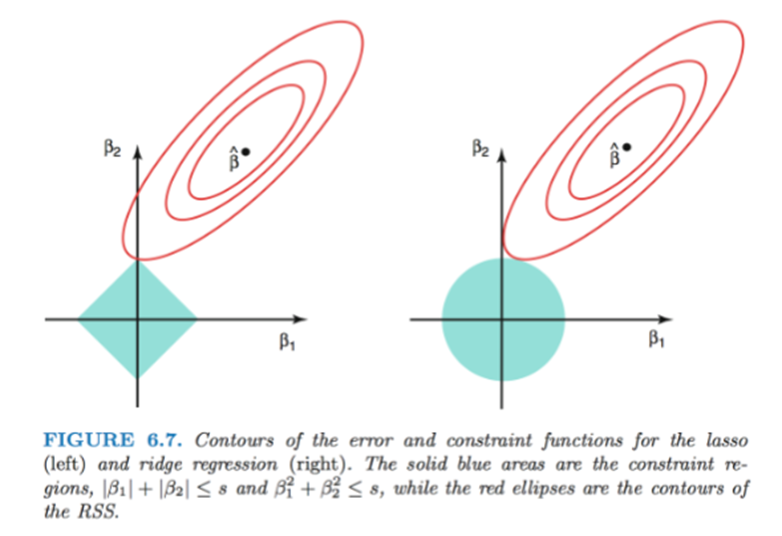

### Elastic - Net Regression

Uses a combination of the $l_1$ and $l_2 $ norms:

Objective Function:

$$ minimize: F(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - x_i \beta)^2 + \lambda \rho || \beta ||_2 + \lambda \frac{1 - \rho}{2} || \beta ||_1$$

* Elastic-Net balances the effects of $l_1$ and $l_2 $ regularization with another hyper-parameter $\rho$

------

### In Python: sci-kit learn (sklearn)

In [23]:
fit

array([ 3.86222403, 11.12001308])

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [25]:
lambda_ = 1.0

In [26]:
ridge_model = Ridge(alpha = lambda_, fit_intercept = False)
ridge_model.fit(x_mat,y)
ridge_model.coef_

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

array([ 3.86265345, 11.00970737])

In [27]:
lasso_model = Lasso(fit_intercept = False)
lasso_model.fit(x_mat,y)
lasso_model.coef_

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

array([ 3.84738078, 10.12722509])

In [28]:
eNet_model = ElasticNet(alpha = lambda_, fit_intercept = False)
eNet_model.fit(x_mat,y)
eNet_model.coef_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

array([3.848926 , 7.0843162])

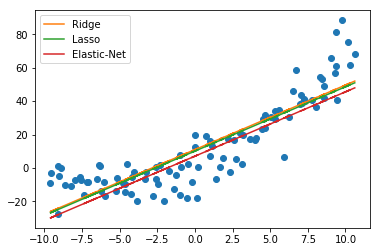

In [29]:
plt.plot(x,y,'o')

ridge_pred = np.poly1d(ridge_model.coef_)
plt.plot(x, ridge_pred(x), '-', label='Ridge')

lasso_pred = np.poly1d(lasso_model.coef_)
plt.plot(x, lasso_pred(x), '-', label='Lasso')

eNet_pred = np.poly1d(eNet_model.coef_)
plt.plot(x, eNet_pred(x), '-', label='Elastic-Net')

plt.legend()

The models from all 4 method (OLS, Ridge, Lasso, Elastic-Net) are very similar. This is largely due to the use of 1 model parameter. Need a more complex data set to compare... but I ran out of time...

In [30]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [31]:
diabetes = load_diabetes()
diabetes_data = diabetes['data']
blood_pressures = diabetes['target']

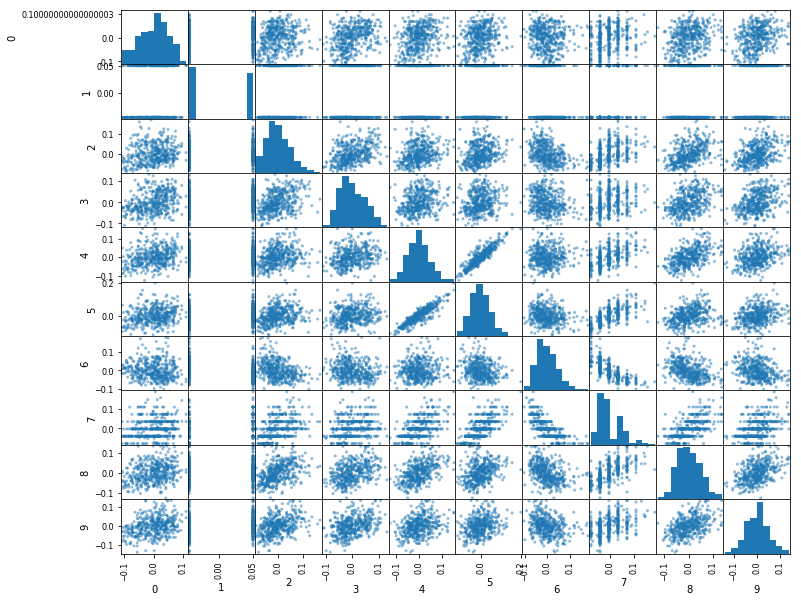

In [32]:
frame = pd.DataFrame(diabetes_data)
fig = pd.plotting.scatter_matrix(frame, figsize=(12,10))

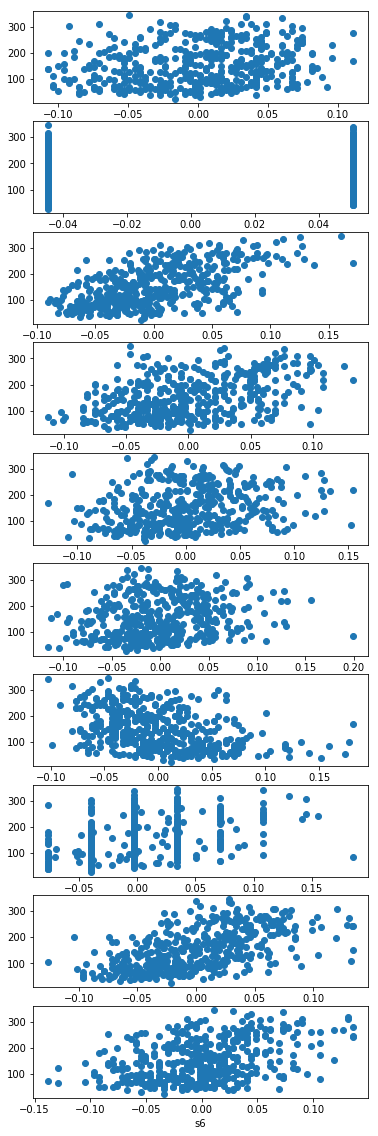

In [33]:
fig = plt.figure(figsize=(6,20))

for i in range(10):
    _ = plt.subplot(10,1,i+1)
    _ = plt.plot(diabetes_data[:,i], blood_pressures, 'o')
    _ = plt.xlabel(diabetes['feature_names'][i])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_data, blood_pressures, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
lin_model.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [37]:
model = Ridge(alpha=10.0, fit_intercept=True)
model.fit(X_train, y_train)
model.coef_

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

array([ 16.83224221,  -0.44029424,  68.05946226,  45.64645564,
        16.81998361,  10.73595036, -43.69414492,  43.52848942,
        63.34758984,  38.50408098])

In [38]:
alphas = np.logspace(-4,3,200)

coeffs = []
for alpha_ in alphas:
    model = Ridge(alpha=alpha_, fit_intercept=True)
    _ = model.fit(X_train, y_train)
    coeffs.append(model.coef_)

In [39]:
coeffs = np.array(coeffs)

In [40]:
n,d = coeffs.shape

In [41]:
modelCV = RidgeCV(alphas=alphas, fit_intercept=True)
_ = modelCV.fit(X_train, y_train)
modelCV.alpha_

0.051114334834401656

Text(0.5, 0, 'Regularization Penalty')

Text(0, 0.5, 'Parameter Coefficient Value')

C:\Users\Sam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


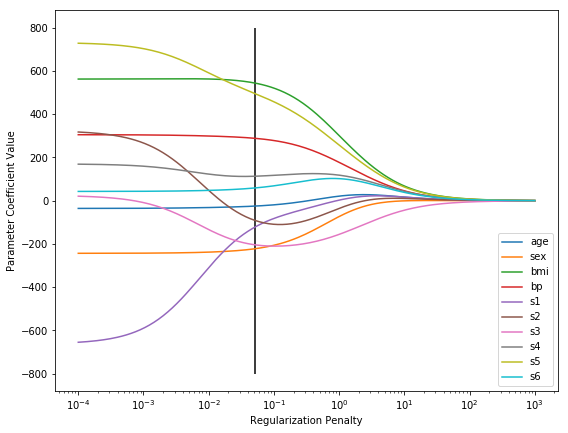

In [42]:
fig = plt.figure(figsize=(9,7))

for i,name in zip(range(d), diabetes['feature_names']):
    _ = plt.semilogx(alphas, coeffs[:,i], label=name)
plt.vlines(modelCV.alpha_, -800, 800)
plt.legend(loc='lower right')
plt.xlabel('Regularization Penalty')
plt.ylabel('Parameter Coefficient Value')
fig.show()

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.0001

C:\Users\Sam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


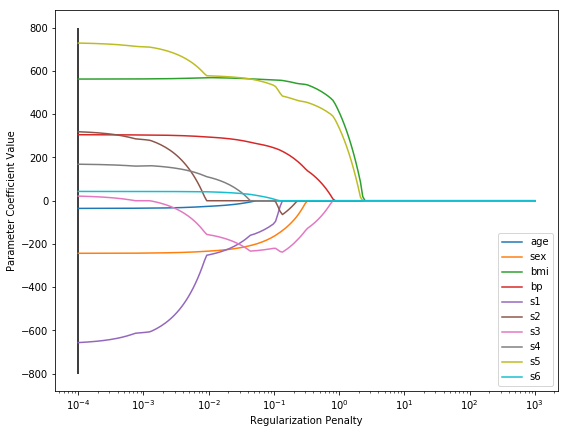

In [43]:
alphas = np.logspace(-4,3,200)

coeffs_lasso = []
for alpha_ in alphas:
    lasso_model = Lasso(alpha=alpha_, fit_intercept=True)
    _ =lasso_model.fit(X_train, y_train)
    coeffs_lasso.append(lasso_model.coef_)
coeffs_lasso = np.array(coeffs_lasso)

lassoCV_ = LassoCV(alphas=alphas, fit_intercept=True)
_=lassoCV_.fit(X_train, y_train)
lassoCV_.alpha_

fig = plt.figure(figsize=(9,7))
for i,name in zip(range(d), diabetes['feature_names']):
    _=plt.semilogx(alphas, coeffs_lasso[:,i], label=name)
_=plt.vlines(lassoCV_.alpha_, -800, 800)
_=plt.legend(loc='lower right')
_=plt.xlabel('Regularization Penalty')
_=plt.ylabel('Parameter Coefficient Value')
fig.show()

In [44]:
print('Label   Linear Model   Ridge CV     Lasso CV ')
print('-------|------------|-----------|-----------|')

for label, lin_coef, ridge_cv_coef, lasso_cv_coeff in zip(diabetes['feature_names'], lin_model.coef_, modelCV.coef_,lassoCV_.coef_):
    print('{!r:>7}  {!r:>11} {!r:>11} {!r:>11}'.format(label,round(lin_coef,5), round(ridge_cv_coef,5),round(lasso_cv_coeff,5)))# round(lin_coef/ridge_cv_coef,5)))

Label   Linear Model   Ridge CV     Lasso CV 
-------|------------|-----------|-----------|
  'age'    -35.55684   -24.72763   -35.43447
  'sex'   -243.16923   -222.0418  -243.08436
  'bmi'    562.75405   544.28974   562.81887
   'bp'    305.47203   288.72943   305.32647
   's1'   -662.78772  -121.87885  -656.08025
   's2'    324.27527   -90.94254   319.18719
   's3'     24.78193  -203.88024    21.44586
   's4'    170.33057   113.28967   168.94666
   's5'    731.67811   495.89092   729.25114
   's6'     43.02847    59.10271     43.0261


Text(0.5, 0, 'age')

Text(0.5, 0, 'sex')

Text(0.5, 0, 'bmi')

Text(0.5, 0, 'bp')

Text(0.5, 0, 's1')

Text(0.5, 0, 's2')

Text(0.5, 0, 's3')

Text(0.5, 0, 's4')

Text(0.5, 0, 's5')

Text(0.5, 0, 's6')

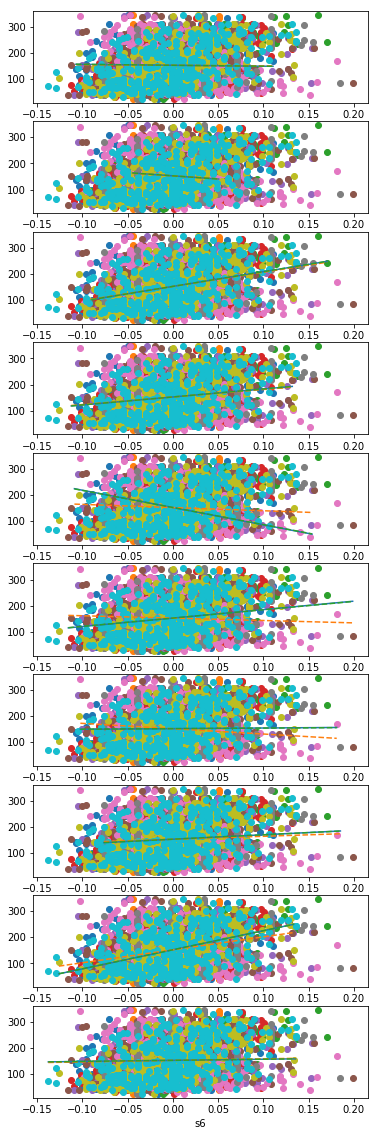

In [45]:
fig = plt.figure(figsize=(6,20))

for i in range(10):
    plt.subplot(10,1,i+1)
    plt.plot(X_train, y_train, 'o')
    plt.xlabel(diabetes['feature_names'][i])
    
    x = np.linspace(min(X_train[:,i]), max(X_train[:,i]),100)
    y_lin = x*lin_model.coef_[i] + lin_model.intercept_
    y_ridge = x*modelCV.coef_[i] + modelCV.intercept_
    y_lasso = x*lassoCV_.coef_[i] + lassoCV_.intercept_
    plt.plot(x, y_lin, '-')
    plt.plot(x, y_ridge, '--')
    plt.plot(x, y_lasso, '--')

In [46]:
lin_model.score(X_test, y_test)
modelCV.score(X_test, y_test)
lassoCV_.score(X_test, y_test)

0.33222203269065154

0.3353992627664799

0.33215427793502855

In [47]:
lin_model.score(diabetes_data, blood_pressures)

0.5154066399202547

In [48]:
modelCV.score(diabetes_data, blood_pressures)

0.513545080239072

In [49]:
from sklearn.linear_model import lasso_path
eps = 5e-3  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = lasso_path(X_train,y_train, alphas=alphas,fit_intercept=True)

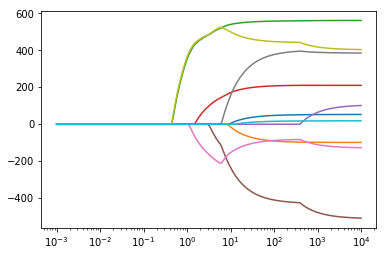

In [50]:
for coef in coefs_lasso:
    plt.semilogx(1/alphas_lasso, coef)

--------------

### Great! 
Now we have several models that we can "tune" the complexity of, simply by adjusting the value of $\lambda$, our penalization factor. 

#### But we have introduced a new problem: How do we determine the best value for $\lambda$??

-----------

# Introducing: Cross-Validation

## For each value of $\lambda$

### 1. Partition the data into several ($k$) sub-sets (also known as $k$ "folds")

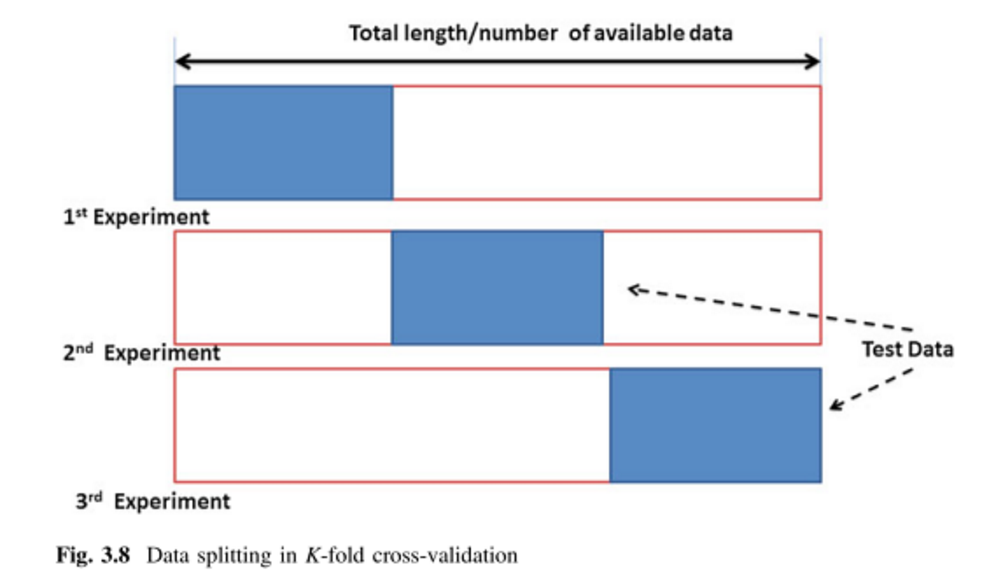

### 2. Use each fold as the "test set" and the remaining $k - 1 $ folds for training the model

### 3. Measure the error of the model on the "test set". Average the error found with each fold

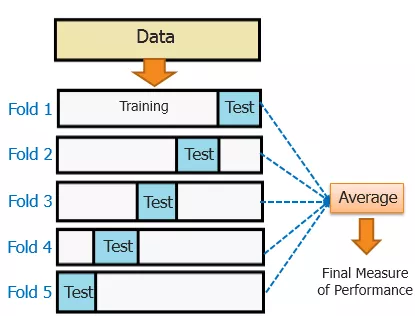

### 4. The optimal value of $\lambda$ is the value that minimizes the average error

### 5. Can be used to "tune" other hyperparameters (e.g. $\rho$ in elastic-net).

## Variations

#### ^ Above is call "k-folds" Cross Validation

Typically use about 5 folds, and 3-10 is common. Total number of model fits required is product of number of folds (k) and number of regularization penalty values ($j \text{ for } \lambda_j$) $\rightarrow k*j$

#### Leave-1-Out Cross Validation

Number of folds = number of observations (Leave out only 1 data point for each fit)

Good for small data sets. Total number of model fits is $n*j$

#### Hold-out Cross Validation

Divide data into two sets: training set and test set (typically about 20% of data in test set).

Perform model fit on training set, evaluate on test set.

Useful when model fitting is time-consuming or if there are few outliers. Total number of model fits is $j$

In [51]:
from sklearn.linear_model import RidgeCV

# array of possible values for lambda
alpha_array = np.logspace(-4, 4, 20)
alpha_array

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [52]:
model = RidgeCV(alphas = alpha_array, fit_intercept = False)
model.fit(x_mat,y)

RidgeCV(alphas=array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]),
    cv=None, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [53]:
model.alpha_

0.0001

In [54]:
model.coef_

array([ 3.86222408, 11.12000195])